<a href="https://colab.research.google.com/github/ollihansen90/MatheSH-StatLern/blob/main/Iris_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(150, 4)


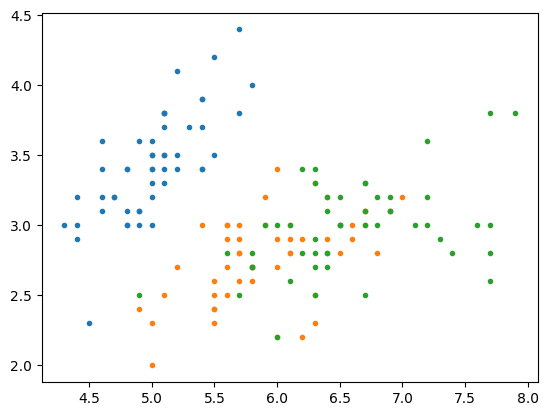

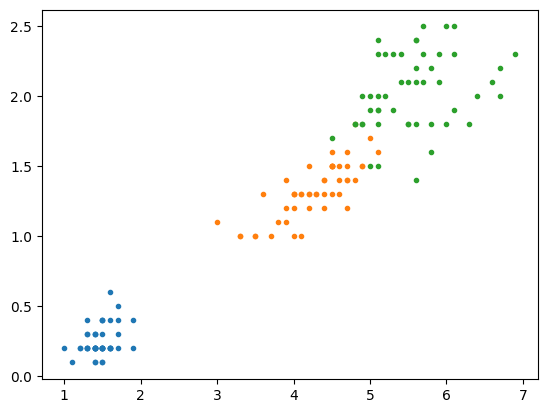

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tqdm.auto import trange

dataset = datasets.load_iris()
data = dataset["data"]
print(data.shape)
labels = dataset["target"]

plt.figure()
plt.plot(data[labels==0,0], data[labels==0,1], ".")
plt.plot(data[labels==1,0], data[labels==1,1], ".")
plt.plot(data[labels==2,0], data[labels==2,1], ".")
plt.show()
plt.figure()
plt.plot(data[labels==0,2], data[labels==0,3], ".")
plt.plot(data[labels==1,2], data[labels==1,3], ".")
plt.plot(data[labels==2,2], data[labels==2,3], ".")
plt.show()

  0%|          | 0/6400 [00:00<?, ?it/s]

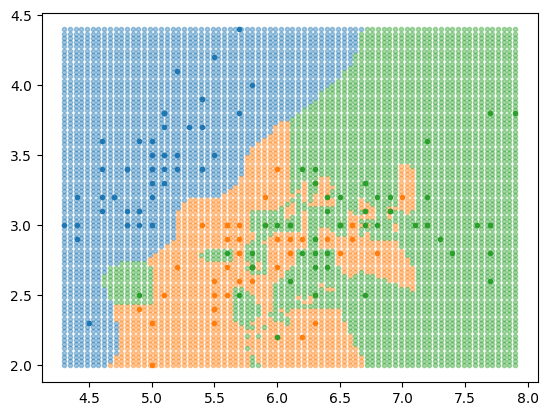

In [69]:
def kNN(point, data, labels, k=5):
    dists = np.sum((data-point)**2, axis=-1)
    neighb = np.argsort(dists)[:k]
    neighb_labels = labels[neighb]
    n_labels = 3*[0]
    for l in neighb_labels:
        n_labels[l] += 1
    return np.argmax(n_labels)

dims = [0,1]
datax_min, datax_max = np.min(data[:,dims[0]]), np.max(data[:,dims[0]])
datay_min, datay_max = np.min(data[:,dims[1]]), np.max(data[:,dims[1]])

n_points = 80
xx = np.linspace(datax_min, datax_max, num=n_points)[None,:]*np.ones([n_points,1])
yy = np.linspace(datay_min, datay_max, num=n_points)[:,None]*np.ones([1,n_points])

testdata = np.reshape(np.stack([xx,yy]), [2,-1]).T
testlabel = np.zeros(len(testdata))

for i in trange(len(testdata)):
    testlabel[i] = kNN(testdata[i], data[:, dims], labels, k=1)

colors = ["tab:blue", "tab:orange", "tab:green"]
plt.figure()
for i in range(3):
    plt.plot(data[labels==i,0], data[labels==i,1], color=colors[i], marker=".", linestyle="")
    plt.plot(testdata[testlabel==i,0], testdata[testlabel==i,1], color=colors[i], marker=".", linestyle="", alpha=0.4)
plt.show()